In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

In [3]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    #plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    plt.axvline(np.mean(inp))
    _, max_ = plt.ylim()
    inp = pd.Series(inp, name="x variable")
    plt.text(
       inp.mean(),
       max_ - max_ / 10,
       "Mean: {:.2f}".format(inp.mean()),
    )
    ax.set_xlabel("x label")
    ax.set_ylabel("y label")
    return plt.figure

In [4]:
ger_sales = np.load("germany_sales.npy")

In [5]:
ger_sales

array([5255, 6677, 5320, 2747, 4863,  723, 1115,  974,    5, 1495, 1653,
       2050, 2034, 4927, 5708, 6008, 5388, 5264, 2619, 3384, 3008, 1062,
       2279, 2512, 3032, 2750, 3719, 4638, 4558, 3977,  483, 1873, 2220,
       2180, 2946, 1706, 1866, 2635, 2544, 4991, 4604, 5291, 4579, 2183,
       2251, 2375, 3372, 2842, 2075, 2508, 2583, 2877, 5455, 5787, 5845,
       5396, 2636, 2470, 2755, 3443, 3661, 2302, 2541, 2548, 2906])

In [6]:
len(ger_sales)

65

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

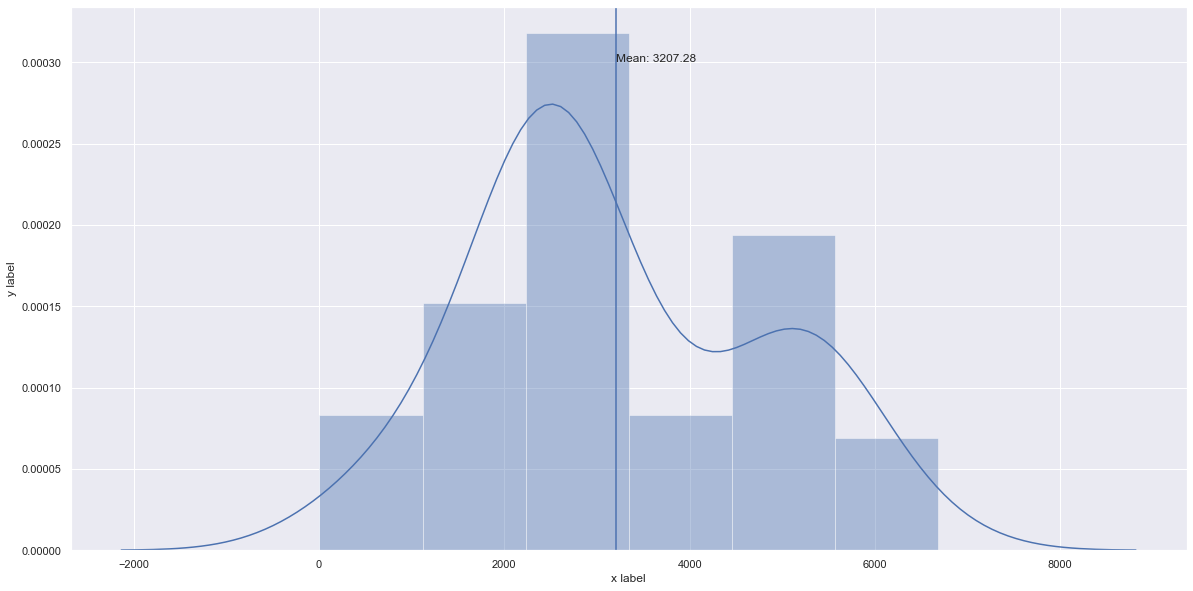

In [38]:
plot_distribution(ger_sales)

In [8]:
fr_sales = np.load("france_sales.npy")

In [9]:
fr_sales

array([   0,  168,  123,  317,  130,  203,  277,  276,  416,   89,  188,
        703,  109,  215, 1537, 2032, 1674, 1558, 2030, 1838, 1810, 2418,
        124, 1463, 1297, 1169, 1511])

In [10]:
len(fr_sales)

27

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

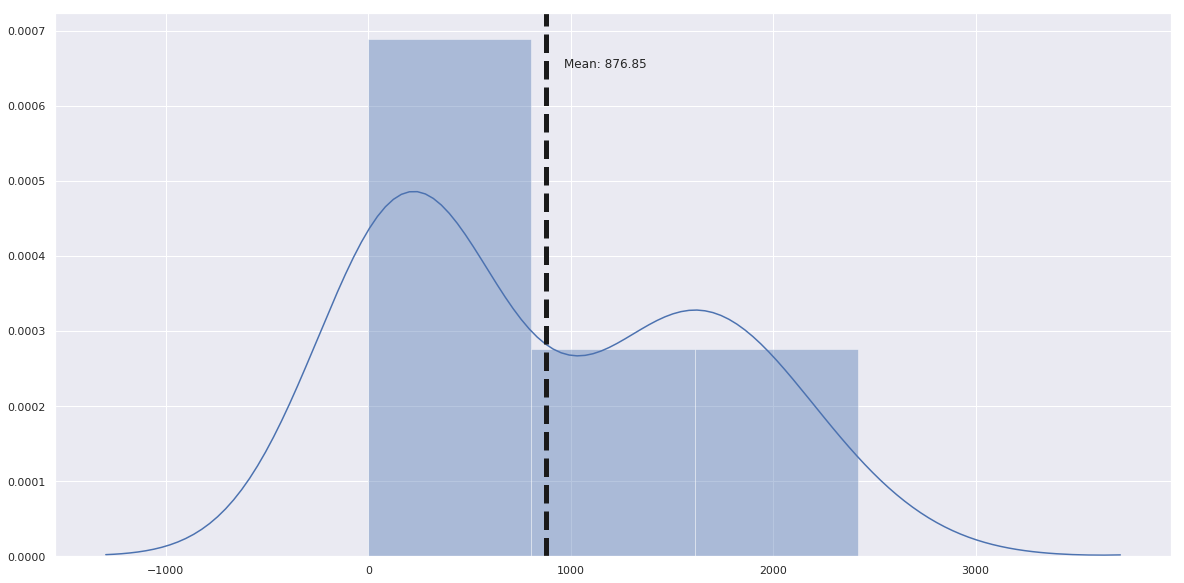

In [11]:
plot_distribution(fr_sales)

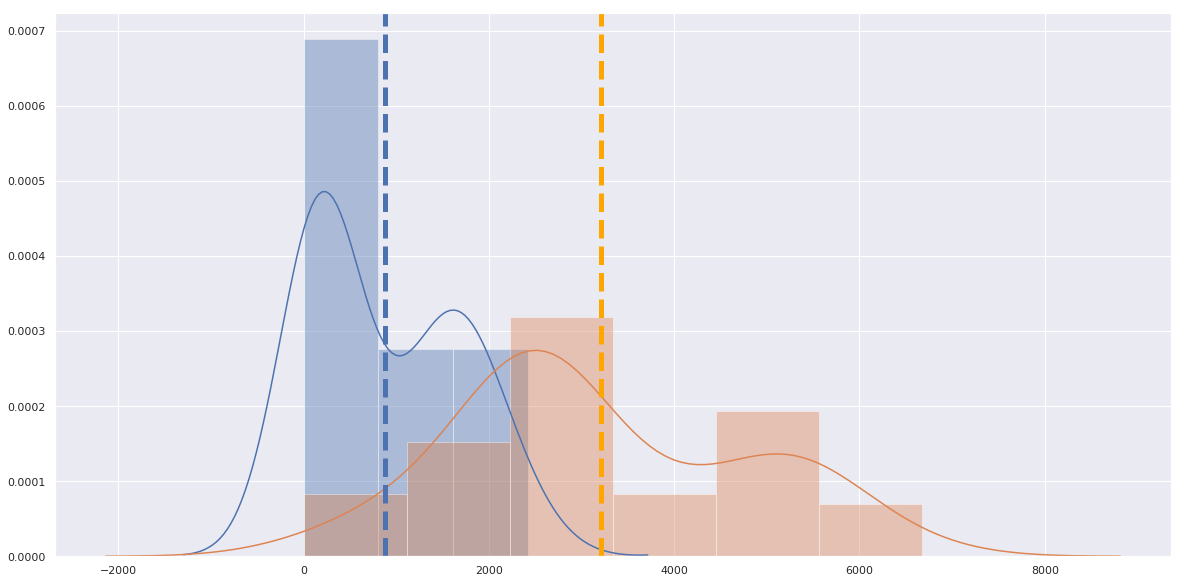

In [12]:
plt.figure()
ax1 = sns.distplot(fr_sales)
ax2 = sns.distplot(ger_sales)
plt.axvline(np.mean(fr_sales), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(ger_sales), color='orange', linestyle='dashed', linewidth=5)

In [13]:
def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

In [14]:
sample_size = 15
ger_sampled = np.random.choice(ger_sales, sample_size)
fr_sampled = np.random.choice(fr_sales, sample_size)
compare_2_groups(ger_sampled, fr_sampled, 0.05, sample_size)

Statistics=4.300, p=0.000
Different distributions (reject H0)
